In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import ggplot

In [2]:
df=pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
#dropping the 2 rows having null values
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

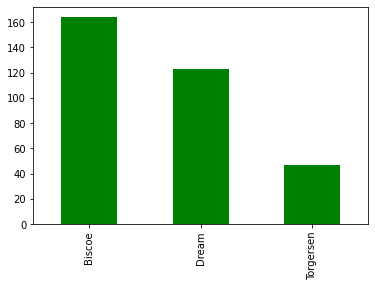

In [10]:
df['island'].value_counts()
df['island'].value_counts().plot(kind='bar',color='green')

['Adelie' 'Chinstrap' 'Gentoo']
Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64


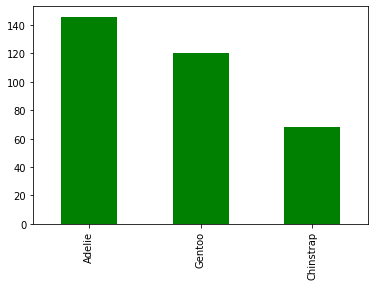

In [11]:
print(df['species'].unique())
print(df['species'].value_counts())
df['species'].value_counts().plot(kind='bar',color='green')


['MALE' 'FEMALE' '.']
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


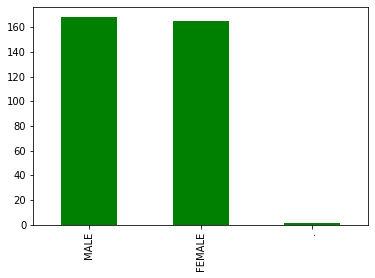

In [12]:
print(df['sex'].unique())
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='bar',color='green')

In [13]:
df.shape

(334, 7)

In [14]:
cor=df.corr()
cor

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


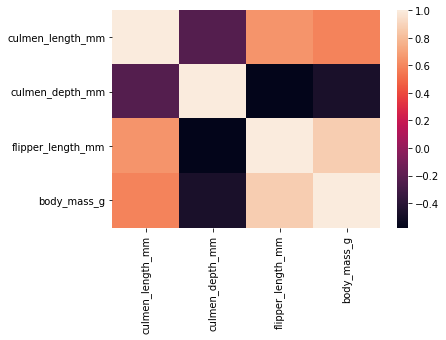

In [15]:
sns.heatmap(cor)

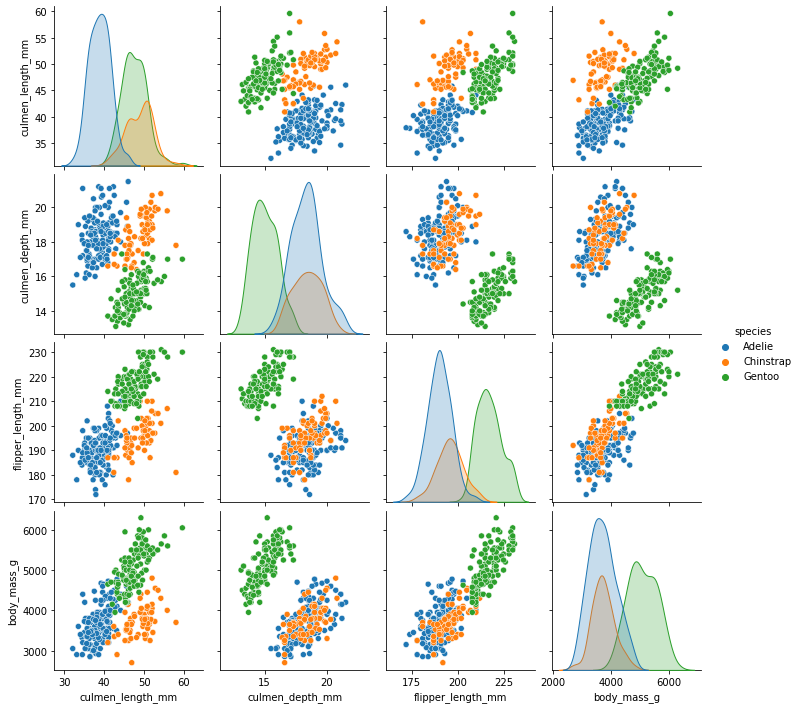

In [16]:
sns.pairplot(data=df, hue='species')


In [17]:
df[df.sex == "."]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [18]:
df.at[336,'sex']='FEMALE'

In [19]:
df.groupby(["species", "sex"]).mean()


culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    FEMALE         45.545763        14.262712         212.779661   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    FEMALE  4683.050847  
          MALE    5484.836066

In [20]:
print(df['sex'].value_counts())


MALE      168
FEMALE    166
Name: sex, dtype: int64


In [21]:
df_scaling = df.drop(["species", "island", "sex"], axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaling)
df_scaled = pd.DataFrame(data=df_scaled, columns=df_scaling.columns)
df_scaled


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.897653,0.783487,-1.429521,-0.571229
1,-0.824290,0.121896,-1.072408,-0.509011
2,-0.677564,0.427246,-0.429605,-1.193405
3,-1.337831,1.088836,-0.572450,-0.944535
4,-0.860972,1.750427,-0.786718,-0.695664
...,...,...,...,...
329,0.587947,-1.761093,0.927425,0.890886
330,0.514584,-1.455743,0.998847,0.797560
331,1.174851,-0.743261,1.498806,1.917477
332,0.221132,-1.201285,0.784580,1.233083


In [23]:
target = df.species

In [24]:
from sklearn.preprocessing import LabelEncoder
enc_target = LabelEncoder()
y = pd.DataFrame(data=enc_target.fit_transform(target.sort_values()).ravel(), columns=['species'])

y

,species
0,0
1,0
2,0
3,0
4,0
...,...
329,2
330,2
331,2
332,2


In [25]:
dummies=['island{}'.format(i) for i in df.island.unique().tolist()] \
               + ['sex{}'.format(i) for i in df.sex.unique().tolist()]

In [26]:
from sklearn.preprocessing import OneHotEncoder

enc_dummies = OneHotEncoder()
enc_dummies_res = enc_dummies.fit_transform(df[['island', 'sex']]).toarray()
df_dummies = pd.DataFrame(data=enc_dummies_res, columns=dummies)
df_dummies

,islandTorgersen,islandBiscoe,islandDream,sexMALE,sexFEMALE
0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
329,1.0,0.0,0.0,1.0,0.0
330,1.0,0.0,0.0,1.0,0.0
331,1.0,0.0,0.0,0.0,1.0
332,1.0,0.0,0.0,1.0,0.0


In [27]:
df_final = pd.concat([df_scaled,df_dummies,y],axis=1)
df_final

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,islandTorgersen,islandBiscoe,islandDream,sexMALE,sexFEMALE,species
0,-0.897653,0.783487,-1.429521,-0.571229,0.0,0.0,1.0,0.0,1.0,0
1,-0.824290,0.121896,-1.072408,-0.509011,0.0,0.0,1.0,1.0,0.0,0
2,-0.677564,0.427246,-0.429605,-1.193405,0.0,0.0,1.0,1.0,0.0,0
3,-1.337831,1.088836,-0.572450,-0.944535,0.0,0.0,1.0,1.0,0.0,0
4,-0.860972,1.750427,-0.786718,-0.695664,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
329,0.587947,-1.761093,0.927425,0.890886,1.0,0.0,0.0,1.0,0.0,2
330,0.514584,-1.455743,0.998847,0.797560,1.0,0.0,0.0,1.0,0.0,2
331,1.174851,-0.743261,1.498806,1.917477,1.0,0.0,0.0,0.0,1.0,2
332,0.221132,-1.201285,0.784580,1.233083,1.0,0.0,0.0,1.0,0.0,2


In [28]:
X = df_final.drop(['species'],axis=1)
y = df_final['species']

In [29]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,islandTorgersen,islandBiscoe,islandDream,sexMALE,sexFEMALE
0,-0.897653,0.783487,-1.429521,-0.571229,0.0,0.0,1.0,0.0,1.0
1,-0.824290,0.121896,-1.072408,-0.509011,0.0,0.0,1.0,1.0,0.0
2,-0.677564,0.427246,-0.429605,-1.193405,0.0,0.0,1.0,1.0,0.0
3,-1.337831,1.088836,-0.572450,-0.944535,0.0,0.0,1.0,1.0,0.0
4,-0.860972,1.750427,-0.786718,-0.695664,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
329,0.587947,-1.761093,0.927425,0.890886,1.0,0.0,0.0,1.0,0.0
330,0.514584,-1.455743,0.998847,0.797560,1.0,0.0,0.0,1.0,0.0
331,1.174851,-0.743261,1.498806,1.917477,1.0,0.0,0.0,0.0,1.0
332,0.221132,-1.201285,0.784580,1.233083,1.0,0.0,0.0,1.0,0.0


In [76]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.40, random_state=0)  

**Decision Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [78]:
y_pred_dt= classifier_dt.predict(x_test)  

In [79]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_dt)
cm  

array([[63,  0,  0],
       [ 4, 20,  0],
       [ 0,  0, 47]])

In [80]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test,y_pred_dt)


0.9701492537313433

**Decision Tree Gini Index**




In [122]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt_g= DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier_dt_g.fit(x_train, y_train)
y_pred_dt_g= classifier_dt_g.predict(x_test)  

In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cm= confusion_matrix(y_test, y_pred_dt_g)
print(cm)  
accuracy_score(y_test,y_pred_dt_g)

[[63  0  0]
 [ 4 20  0]
 [ 0  0 47]]


0.9701492537313433

**SVM** 

In [81]:
from sklearn.svm import SVC 
classifier_svc = SVC(kernel='linear', random_state=0)  
classifier_svc.fit(x_train, y_train)
y_pred_svc=classifier_svc.predict(x_test)  
cm= confusion_matrix(y_test, y_pred_svc)
cm  

array([[63,  0,  0],
       [ 2, 22,  0],
       [ 0,  0, 47]])

In [82]:
accuracy_score(y_test,y_pred_svc)

0.9850746268656716

**Logistic Regression**

In [85]:
from sklearn.linear_model import LogisticRegression  
classifier_lr= LogisticRegression(random_state=0)  
classifier_lr.fit(x_train, y_train) 
y_pred_lr=classifier_lr.predict(x_test) 

In [86]:
accuracy_score(y_test,y_pred_lr)


0.9850746268656716

**Naive Bayes**


In [89]:
from sklearn.naive_bayes import GaussianNB  
classifier_nb = GaussianNB()  
classifier_nb.fit(x_train, y_train)  
y_pred_nb = classifier_nb.predict(x_test)  

In [90]:
cm= confusion_matrix(y_test, y_pred_nb)
cm

array([[23, 24, 16],
       [ 0, 24,  0],
       [ 0,  0, 47]])

In [91]:
accuracy_score(y_test,y_pred_nb)


0.7014925373134329

In [126]:
#Max accuracy is given by Logistic regression
